In [1]:
import sys

sys.path.insert(0, '..')

## Setup the model area

In [2]:
from morpheus.project.types.discretization import SpatialDiscretization
from morpheus.project.types.discretization.spatial import Rotation, Grid, Crs
from morpheus.project.types.geometry import Polygon, LineString

polygon = Polygon(
  type='Polygon',
  coordinates=[[
    (13.92, 50.964),
    (13.92, 50.966),
    (13.925, 50.966),
    (13.925, 50.964),
    (13.92, 50.964)
  ]]
)

rotation = Rotation(0)

grid = Grid.cartesian_from_polygon(polygon=polygon, n_cols=100, n_rows=50, rotation=rotation)
spatial_discretization = SpatialDiscretization.from_geometry_with_grid(
  geometry=polygon,
  grid=grid,
  crs=Crs.from_str('EPSG:4326')
)

[(0, 0)] [(99, 0)]
[(0, 1)] [(99, 1)]
[(0, 2)] [(99, 2)]
[(0, 3)] [(99, 3)]
[(0, 4)] [(99, 4)]
[(0, 5)] [(99, 5)]
[(0, 6)] [(99, 6)]
[(0, 7)] [(99, 7)]
[(0, 8)] [(99, 8)]
[(0, 9)] [(99, 9)]
[(0, 10)] [(99, 10)]
[(0, 11)] [(99, 11)]
[(0, 12)] [(99, 12)]
[(0, 13)] [(99, 13)]
[(0, 14)] [(99, 14)]
[(0, 15)] [(99, 15)]
[(0, 16)] [(99, 16)]
[(0, 17)] [(99, 17)]
[(0, 18)] [(99, 18)]
[(0, 19)] [(99, 19)]
[(0, 20)] [(99, 20)]
[(0, 21)] [(99, 21)]
[(0, 22)] [(99, 22)]
[(0, 23)] [(99, 23)]
[(0, 24)] [(99, 24)]
[(0, 25)] [(99, 25)]
[(0, 26)] [(99, 26)]
[(0, 27)] [(99, 27)]
[(0, 28)] [(99, 28)]
[(0, 29)] [(99, 29)]
[(0, 30)] [(99, 30)]
[(0, 31)] [(99, 31)]
[(0, 32)] [(99, 32)]
[(0, 33)] [(99, 33)]
[(0, 34)] [(99, 34)]
[(0, 35)] [(99, 35)]
[(0, 36)] [(99, 36)]
[(0, 37)] [(99, 37)]
[(0, 38)] [(99, 38)]
[(0, 39)] [(99, 39)]
[(0, 40)] [(99, 40)]
[(0, 41)] [(99, 41)]
[(0, 42)] [(99, 42)]
[(0, 43)] [(99, 43)]
[(0, 44)] [(99, 44)]
[(0, 45)] [(99, 45)]
[(0, 46)] [(99, 46)]
[(0, 47)] [(99, 47)]
[(0, 48)] [(

## Setup Time Discretization

In [3]:
from morpheus.project.types.discretization.time.TimeUnit import TimeUnit
from morpheus.project.types.discretization.time.Stressperiods import StartDateTime, StressPeriodCollection, \
  StressPeriod, NumberOfTimeSteps, TimeStepMultiplier, IsSteadyState
from morpheus.project.types.discretization.time import TimeDiscretization
from datetime import datetime

time_discretization = TimeDiscretization(
  start_date_time=StartDateTime.from_datetime(datetime(2020, 1, 1)),
  end_date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
  stress_periods=StressPeriodCollection([
    StressPeriod(
      start_date_time=StartDateTime.from_datetime(datetime(2020, 1, 1)),
      number_of_time_steps=NumberOfTimeSteps(1),
      time_step_multiplier=TimeStepMultiplier(1),
      steady_state=IsSteadyState.yes()
    ),
  ]),
  time_unit=TimeUnit.days()
)

# Setup Model

In [4]:
from morpheus.project.types.Model import Model

model = Model.new()
model = model.with_updated_time_discretization(time_discretization)
model = model.with_updated_spatial_discretization(spatial_discretization=spatial_discretization)

In [5]:
import folium

m = folium.Map(tiles="cartodbpositron", crs="EPSG3857", zoom_start=12, location=[50.965, 13.922])
m.add_child(folium.GeoJson(polygon.as_geojson()))

m.fit_bounds(m.get_bounds())
m

# Setup general head boundaries with two observations

In [6]:
from morpheus.project.types.boundaries.Observation import ObservationName
from morpheus.project.types.boundaries.GeneralHeadObservation import ObservationId, GeneralHeadRawDataItem, \
  GeneralHeadObservation, Stage, Conductance
from morpheus.project.types.geometry import Point
from morpheus.project.types.boundaries.Boundary import BoundaryName, BoundaryCollection
from morpheus.project.types.boundaries.Boundary import GeneralHeadBoundary


general_head_east = GeneralHeadBoundary.from_geometry(
  name=BoundaryName('general_head_east'),
  geometry=LineString([
    (13.92499, 50.966),
    (13.92499, 50.964),
  ]),
  grid=grid,
  affected_layers=[model.layers[0].layer_id],
  observations=[
    GeneralHeadObservation(
      observation_id=ObservationId.new(),
      observation_name=ObservationName.default(),
      geometry=Point((13.92499, 50.966)),
      data=[
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2019, 1, 1)),
          stage=Stage.from_float(100),
          conductance=Conductance.from_float(100),
        ),
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2021, 12, 31)),
          stage=Stage.from_float(100),
          conductance=Conductance.from_float(100),
        ),
      ]
    ),
  ]
)

general_head_west = GeneralHeadBoundary.from_geometry(
  name=BoundaryName('general_head_west'),
  geometry=LineString([
    (13.92004, 50.96401),
    (13.92004, 50.96599),
  ]),
  grid=grid,
  affected_layers=[model.layers[0].layer_id],
  observations=[
    GeneralHeadObservation(
      observation_id=ObservationId.new(),
      observation_name=ObservationName.default(),
      geometry=Point((13.92004, 50.96599)),
      data=[
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2019, 1, 1)),
          stage=Stage.from_float(100),
          conductance=Conductance.from_float(300),
        ),
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2021, 12, 31)),
          stage=Stage.from_float(100),
          conductance=Conductance.from_float(300),
        ),
      ]
    ),
  ]
)

boundary_collection = BoundaryCollection.new()
boundary_collection.add_boundary(general_head_west)
boundary_collection.add_boundary(general_head_east)

model = model.with_updated_boundaries(boundaries=boundary_collection)

m.add_child(folium.GeoJson(general_head_east.as_geojson()))
m.add_child(folium.GeoJson(general_head_east.affected_cells.to_geojson(grid).as_geojson()))
for observation in general_head_east.observations:
  m.add_child(folium.GeoJson(observation.as_geojson()))

m.add_child(folium.GeoJson(general_head_west.as_geojson()))
m.add_child(folium.GeoJson(general_head_west.affected_cells.to_geojson(grid).as_geojson()))
for observation in general_head_west.observations:
  m.add_child(folium.GeoJson(observation.as_geojson()))
m.fit_bounds(m.get_bounds())
m

# Setup Recharge Boundary

In [7]:
from morpheus.project.types.boundaries.Boundary import RechargeBoundary
from morpheus.project.types.boundaries.RechargeObservation import RechargeObservationValue, RechargeRate

recharge_area = Polygon(
  type='Polygon',
  coordinates=[[
    (
      13.92181326103696,
      50.96574333352123
    ),
    (
      13.92181326103696,
      50.96440649737727
    ),
    (
      13.923994608237564,
      50.96440649737727
    ),
    (
      13.923994608237564,
      50.96574333352123
    ),
    (
      13.92181326103696,
      50.96574333352123
    )
  ]]

)

recharge = RechargeBoundary.from_geometry(
  name=BoundaryName('recharge'),
  geometry=recharge_area,
  grid=grid,
  affected_layers=[model.layers[0].layer_id],
  data=[
    RechargeObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2019, 1, 1)),
      recharge_rate=RechargeRate.from_float(0.001),
    ),
    RechargeObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2021, 12, 31)),
      recharge_rate=RechargeRate.from_float(0.001),
    ),
  ]
)

boundary_collection.add_boundary(recharge)

m.add_child(folium.GeoJson(recharge.as_geojson()))
m.add_child(folium.GeoJson(recharge.affected_cells.to_geojson(grid).as_geojson()))
m.fit_bounds(m.get_bounds())
m

[(36, 6)] [(79, 6)]
[(36, 7)] [(79, 7)]
[(36, 8)] [(79, 8)]
[(36, 9)] [(79, 9)]
[(36, 10)] [(79, 10)]
[(36, 11)] [(79, 11)]
[(36, 12)] [(79, 12)]
[(36, 13)] [(79, 13)]
[(36, 14)] [(79, 14)]
[(36, 15)] [(79, 15)]
[(36, 16)] [(79, 16)]
[(36, 17)] [(79, 17)]
[(36, 18)] [(79, 18)]
[(36, 19)] [(79, 19)]
[(36, 20)] [(79, 20)]
[(36, 21)] [(79, 21)]
[(36, 22)] [(79, 22)]
[(36, 23)] [(79, 23)]
[(36, 24)] [(79, 24)]
[(36, 25)] [(79, 25)]
[(36, 26)] [(79, 26)]
[(36, 27)] [(79, 27)]
[(36, 28)] [(79, 28)]
[(36, 29)] [(79, 29)]
[(36, 30)] [(79, 30)]
[(36, 31)] [(79, 31)]
[(36, 32)] [(79, 32)]
[(36, 33)] [(79, 33)]
[(36, 34)] [(79, 34)]
[(36, 35)] [(79, 35)]
[(36, 36)] [(79, 36)]
[(36, 37)] [(79, 37)]
[(36, 38)] [(79, 38)]
[(36, 39)] [(79, 39)]


In [8]:
from morpheus.project.infrastructure.calculation.engines.modflow_2005.packages.RchPackageMapper import calculate_rch_boundary_stress_period_data

result = calculate_rch_boundary_stress_period_data(
  spatial_discretization=spatial_discretization,
  time_discretization=time_discretization,
  layers=model.layers,
  rch_boundary=recharge,
)
result.to_dict()[0]

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

## Calculate

In [9]:
from morpheus.project.infrastructure.calculation.engines.base.CalculationEngineFactory import CalculationEngineFactory
from morpheus.project.types.calculation.CalculationProfile import CalculationProfile, CalculationEngineType
from morpheus.project.types.calculation.Calculation import CalculationId

calculation_id = CalculationId.new()
calculation_profile = CalculationProfile.new(CalculationEngineType.MF2005)
engine = CalculationEngineFactory.create_engine(calculation_id=calculation_id, engine_type=calculation_profile.engine_type)
check_model_log = engine.preprocess(model, calculation_profile)
check_model_log.to_list()

Errors and/or Warnings encountered.
  see ../../../../../../../../var/folders/g7/z7m625rj50d5ptztzplh4wgc0000gn/T/tmphbl2kbmq for details.



['type,package,k,i,j,value,desc',
 'Warning,RCH,0,0,0,0.000299,Mean R/T ratio > checker warning threshold of 0.0002 for 1 stress periods']

In [10]:
log, result = engine.run(model=model, calculation_profile=calculation_profile)

FloPy is using the following executable to run the model: ../../../../../../../src/backend/.venv/bin/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: mf2005.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2024/08/19 22:26:23

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2024/08/19 22:26:23
 Elapsed run time:  0.015 Seconds

  Normal termination of simulation


In [11]:
result

CalculationResult(type=<CalculationResultType.SUCCESS: 'success'>, message='Calculation finished successfully', files=['mf2005.list', 'mf2005.rch', 'mf2005.ghb', 'mf2005.dis', 'mf2005.nam', 'mf2005.bas', 'mf2005.lpf', 'mf2005.pcg', 'mf2005.oc', 'mf2005.hds'], flow_head_results=AvailableResults(times=[365.0], kstpkper=[(0, 0)], number_of_layers=1, number_of_observations=0, min_value=100.00157165527344, max_value=118.79037475585938), flow_drawdown_results=None, flow_budget_results=AvailableResults(times=[365.0], kstpkper=[(0, 0)], number_of_layers=0, number_of_observations=0, min_value=None, max_value=None), transport_concentration_results=None, transport_budget_results=None, packages=['DIS', 'BAS6', 'RCH', 'GHB', 'PCG', 'LPF', 'OC'])

In [12]:
head = engine.read_flow_head(idx=0, layer=0)

In [13]:
import simplejson as json

json = json.dumps(head, ignore_nan=True)
json

'[[100.00170135498047, 100.39859771728516, 100.79560089111328, 101.19249725341797, 101.58940124511719, 101.98619842529297, 102.38289642333984, 102.77950286865234, 103.1759033203125, 103.57219696044922, 103.96829986572266, 104.36409759521484, 104.75969696044922, 105.15489959716797, 105.54979705810547, 105.94409942626953, 106.33799743652344, 106.731201171875, 107.12359619140625, 107.51529693603516, 107.90589904785156, 108.29540252685547, 108.68360137939453, 109.07019805908203, 109.45500183105469, 109.83779907226562, 110.21810150146484, 110.595703125, 110.97000122070312, 111.3405990600586, 111.70680236816406, 112.06790161132812, 112.42310333251953, 112.77159881591797, 113.11219787597656, 113.44380187988281, 113.76529693603516, 114.07540130615234, 114.37300109863281, 114.65699768066406, 114.92620086669922, 115.17980194091797, 115.41690063476562, 115.63700103759766, 115.83930206298828, 116.02339935302734, 116.18879699707031, 116.33519744873047, 116.46219635009766, 116.56950378417969, 116.65

In [14]:
engine.read_flow_drawdown(idx=0, layer=0)

[]

In [15]:
engine.read_flow_budget(idx=0, incremental=False)

{'STORAGE_IN': 0.0,
 'CONSTANT_HEAD_IN': 0.0,
 'HEAD_DEP_BOUNDS_IN': 0.0,
 'RECHARGE_IN': 21488.088,
 'TOTAL_IN': 21488.088,
 'STORAGE_OUT': -0.0,
 'CONSTANT_HEAD_OUT': -0.0,
 'HEAD_DEP_BOUNDS_OUT': -21488.088,
 'RECHARGE_OUT': -0.0,
 'TOTAL_OUT': -21488.088,
 'IN-OUT': 0.0,
 'PERCENT_DISCREPANCY': 0.0,
 'tslen': 365.0}

In [16]:
engine.read_flow_budget(idx=0, incremental=True)

{'STORAGE_IN': 0.0,
 'CONSTANT_HEAD_IN': 0.0,
 'HEAD_DEP_BOUNDS_IN': 0.0,
 'RECHARGE_IN': 58.8715,
 'TOTAL_IN': 58.8715,
 'STORAGE_OUT': -0.0,
 'CONSTANT_HEAD_OUT': -0.0,
 'HEAD_DEP_BOUNDS_OUT': -58.8715,
 'RECHARGE_OUT': -0.0,
 'TOTAL_OUT': -58.8715,
 'IN-OUT': 0.0,
 'PERCENT_DISCREPANCY': 0.0,
 'tslen': 365.0}

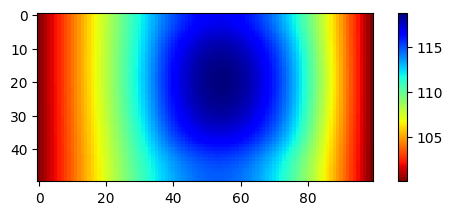

In [17]:
import matplotlib.pyplot as plt

heads = engine.read_flow_head(idx=0, layer=0)
plt.subplot(2, 1, 1)
plt.imshow(heads, cmap='jet_r')
plt.colorbar()
plt.show()